In [365]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

import pandas as pd
import numpy as np

In [475]:
data = [[0,0,0,0],
        [1,0,0,0],
        [0,1,0,0],
        #[0,0,1,0],
        [1,1,0,0],
        [1,0,1,0],
        [0,1,1,0],
        [1,1,1,1]]
df = pd.DataFrame(data, columns=['a','b','c','target'])

In [476]:
df

,a,b,c,target
0,0,0,0,0
1,1,0,0,0
2,0,1,0,0
3,1,1,0,0
4,1,0,1,0
5,0,1,1,0
6,1,1,1,1


In [477]:
model = tf.keras.Sequential([
    layers.InputLayer(input_shape=(3)),
    layers.Dense(units=50),
    layers.Softmax(),
    layers.Dense(units=1)
])

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='MSE')

model.build()

model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 50)                200       
_________________________________________________________________
softmax_3 (Softmax)          (None, 50)                0         
_________________________________________________________________
dense_61 (Dense)             (None, 1)                 51        
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________


In [478]:
training_data = df[['a','b','c']]
training_labels = df[['target']]

In [479]:
t_data = training_data.values.tolist().copy()
final_t_data = []
for data in t_data:
    final_t_data.append(data)
    
final_t_data

[[0, 0, 0], [1, 0, 0], [0, 1, 0], [1, 1, 0], [1, 0, 1], [0, 1, 1], [1, 1, 1]]

In [480]:
t_labels = training_labels.values.tolist().copy()
final_t_labels = []
for data in t_labels:
    final_t_labels.append(data)
    
final_t_labels

[[0], [0], [0], [0], [0], [0], [1]]

In [481]:
%%time
history = model.fit(
    final_t_data, final_t_labels,
    epochs=100,
    verbose=0)

Wall time: 1.29 s


In [482]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

<AxesSubplot:>

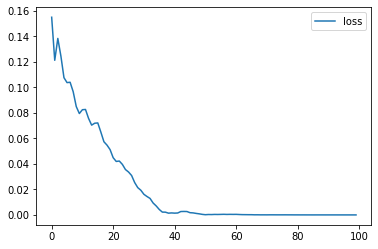

In [483]:
hist[['loss']].plot.line()

In [484]:
prediction_df = training_data.copy()
prediction_df

,a,b,c
0,0,0,0
1,1,0,0
2,0,1,0
3,1,1,0
4,1,0,1
5,0,1,1
6,1,1,1


In [485]:
prediction_df.values[1].tolist()

[1, 0, 0]

In [490]:
model.predict([[0,0,1]])

array([[-0.13347764]], dtype=float32)

In [491]:
prediction_df['results'] = model.predict([test_data[0])

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (<ipython-input-491-23de4108ca65>, line 1)

In [ ]:
prediction_df['results']=(prediction_df['results']-prediction_df['results'].min())/(prediction_df['results'].max()-prediction_df['results'].min())
prediction_df